# Preparing the environment

In [0]:
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [0]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [0]:
# Input the Data
trainData = pd.read_csv('train.csv') #creates a dataframe
testData = pd.read_csv('test.csv') #creates a dataframe

# Basic Data Preprocessing
trainData.text = trainData.text.str.replace("[^a-zA-Z#]", " ")
trainData.text = trainData.text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
trainData.text = trainData.text.apply(lambda x: x.lower())

testData.text = testData.text.str.replace("[^a-zA-Z#]", " ")
testData.text = testData.text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
testData.text = testData.text.apply(lambda x: x.lower())

test_df = testData
#train_df = trainData

In [0]:
# Create a copy of the DataFrame to work from
# Omit random state to have different random split each run
train_copy = trainData.copy()
train_df = train_copy.sample(frac=0.8) # , random_state=0
test_internal_df = train_copy.drop(train_df.index)

In [0]:
train_df.rename(columns = {'target':'polarity','text':'sentence'}, inplace = True)
test_internal_df.rename(columns = {'target':'polarity','text':'sentence'}, inplace = True)
test_df.rename(columns = {'text':'sentence'}, inplace = True)

# Model Input functions


In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df.drop(['id','location','keyword'],axis = 1), train_df["polarity"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df.drop(['id','location','keyword'],axis = 1), train_df["polarity"], shuffle=False)
# Prediction on the Internal test set.
predict_test_internal_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_internal_df.drop(['id','location','keyword'],axis = 1), test_internal_df["polarity"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df.drop(['id','location','keyword'],axis = 1), y=None , shuffle=False)

# Feature Extraction

In [0]:
embedded_text_feature_column_a = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/universal-sentence-encoder/2")

# Estimator

For classification we can use a [DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier)

In [0]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[1024, 512, 256],
    dropout=0.5,
    feature_columns=[embedded_text_feature_column_a],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwnvf0iev', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc4eb6fea58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwnvf0iev', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc4eb6fea58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training

Train the estimator for a reasonable amount of steps.

In [0]:
# Training for 1,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 5 epochs since the training dataset
# contains 25,000 examples.
#estimator.train(input_fn=train_input_fn, steps=1000);

estimator.train(input_fn=train_input_fn, steps=1100);

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpwnvf0iev/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpwnvf0iev/model.ckpt.


INFO:tensorflow:loss = 88.898926, step = 1


INFO:tensorflow:loss = 88.898926, step = 1


INFO:tensorflow:global_step/sec: 18.8222


INFO:tensorflow:global_step/sec: 18.8222


INFO:tensorflow:loss = 56.096184, step = 101 (5.318 sec)


INFO:tensorflow:loss = 56.096184, step = 101 (5.318 sec)


INFO:tensorflow:global_step/sec: 20.582


INFO:tensorflow:global_step/sec: 20.582


INFO:tensorflow:loss = 58.614956, step = 201 (4.863 sec)


INFO:tensorflow:loss = 58.614956, step = 201 (4.863 sec)


INFO:tensorflow:global_step/sec: 21.6844


INFO:tensorflow:global_step/sec: 21.6844


INFO:tensorflow:loss = 60.162006, step = 301 (4.605 sec)


INFO:tensorflow:loss = 60.162006, step = 301 (4.605 sec)


INFO:tensorflow:global_step/sec: 21.3033


INFO:tensorflow:global_step/sec: 21.3033


INFO:tensorflow:loss = 41.681427, step = 401 (4.698 sec)


INFO:tensorflow:loss = 41.681427, step = 401 (4.698 sec)


INFO:tensorflow:global_step/sec: 21.6862


INFO:tensorflow:global_step/sec: 21.6862


INFO:tensorflow:loss = 43.406216, step = 501 (4.607 sec)


INFO:tensorflow:loss = 43.406216, step = 501 (4.607 sec)


INFO:tensorflow:global_step/sec: 21.5584


INFO:tensorflow:global_step/sec: 21.5584


INFO:tensorflow:loss = 50.5583, step = 601 (4.642 sec)


INFO:tensorflow:loss = 50.5583, step = 601 (4.642 sec)


INFO:tensorflow:global_step/sec: 21.5291


INFO:tensorflow:global_step/sec: 21.5291


INFO:tensorflow:loss = 42.15109, step = 701 (4.642 sec)


INFO:tensorflow:loss = 42.15109, step = 701 (4.642 sec)


INFO:tensorflow:global_step/sec: 21.3199


INFO:tensorflow:global_step/sec: 21.3199


INFO:tensorflow:loss = 38.140194, step = 801 (4.691 sec)


INFO:tensorflow:loss = 38.140194, step = 801 (4.691 sec)


INFO:tensorflow:global_step/sec: 21.6403


INFO:tensorflow:global_step/sec: 21.6403


INFO:tensorflow:loss = 61.383095, step = 901 (4.623 sec)


INFO:tensorflow:loss = 61.383095, step = 901 (4.623 sec)


INFO:tensorflow:global_step/sec: 21.5393


INFO:tensorflow:global_step/sec: 21.5393


INFO:tensorflow:loss = 32.283726, step = 1001 (4.643 sec)


INFO:tensorflow:loss = 32.283726, step = 1001 (4.643 sec)


INFO:tensorflow:Saving checkpoints for 1100 into /tmp/tmpwnvf0iev/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1100 into /tmp/tmpwnvf0iev/model.ckpt.


INFO:tensorflow:Loss for final step: 44.13649.


INFO:tensorflow:Loss for final step: 44.13649.


8417 - 1100

# Prediction

Run predictions for both training and test set.

In [0]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_internal_eval_result = estimator.evaluate(input_fn=predict_test_internal_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Internal Test set accuracy: {accuracy}".format(**test_internal_eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-28T01:23:43Z


INFO:tensorflow:Starting evaluation at 2019-12-28T01:23:43Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-28-01:23:53


INFO:tensorflow:Finished evaluation at 2019-12-28-01:23:53


INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.8796795, accuracy_baseline = 0.5703402, auc = 0.9417409, auc_precision_recall = 0.93959725, average_loss = 0.29932472, global_step = 1100, label/mean = 0.42965978, loss = 37.979317, precision = 0.9314767, prediction/mean = 0.4070411, recall = 0.7771324


INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.8796795, accuracy_baseline = 0.5703402, auc = 0.9417409, auc_precision_recall = 0.93959725, average_loss = 0.29932472, global_step = 1100, label/mean = 0.42965978, loss = 37.979317, precision = 0.9314767, prediction/mean = 0.4070411, recall = 0.7771324


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1100: /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1100: /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-28T01:24:00Z


INFO:tensorflow:Starting evaluation at 2019-12-28T01:24:00Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-28-01:24:09


INFO:tensorflow:Finished evaluation at 2019-12-28-01:24:09


INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.8850952, accuracy_baseline = 0.58109, auc = 0.9456573, auc_precision_recall = 0.94356114, average_loss = 0.28639153, global_step = 1100, label/mean = 0.41891006, loss = 36.34786, precision = 0.93927896, prediction/mean = 0.3961264, recall = 0.7758621


INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.8850952, accuracy_baseline = 0.58109, auc = 0.9456573, auc_precision_recall = 0.94356114, average_loss = 0.28639153, global_step = 1100, label/mean = 0.41891006, loss = 36.34786, precision = 0.93927896, prediction/mean = 0.3961264, recall = 0.7758621


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1100: /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1100: /tmp/tmpwnvf0iev/model.ckpt-1100


Training set accuracy: 0.8796795010566711
Internal Test set accuracy: 0.8850951790809631


# Model Evaluation
We can visually check the confusion matrix to understand the distribution of misclassifications.

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


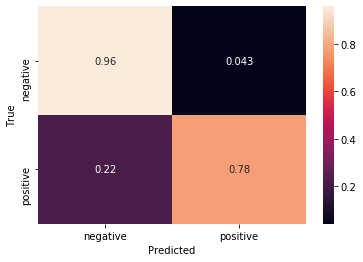

In [0]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(train_df["polarity"], 
                           get_predictions(estimator, predict_train_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

Train Scores

In [0]:
TrainDataPredict = train_df
TrainDataPredict["Predictions"] = get_predictions(estimator, predict_train_input_fn)

from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(TrainDataPredict.polarity, TrainDataPredict.Predictions),"\n")
print(f1_score(TrainDataPredict.polarity, TrainDataPredict.Predictions))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


0.8796794955996322 

0.8473333333333333


Internal Test Scores

In [0]:
TestInternalDataPredict = test_internal_df
TestInternalDataPredict["Predictions"] = get_predictions(estimator, predict_test_internal_input_fn)
print(accuracy_score(TestInternalDataPredict.polarity, TestInternalDataPredict.Predictions),"\n")
print(f1_score(TestInternalDataPredict.polarity, TestInternalDataPredict.Predictions))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


0.8850952068286277 

0.8497854077253219


# Hard Predictions

In [0]:
output = pd.read_csv("sample_submission.csv")
output["target"] = get_predictions(estimator, predict_test_input_fn)
output.to_csv("TF_Hub6.csv", index=False)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Restoring parameters from /tmp/tmpwnvf0iev/model.ckpt-1100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.
